In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from scipy.special import softmax
from scipy import stats as scistats
import plotly.express as px
import seaborn as sns
import sys
import os

sys.path.append('../')
from common.plot_style_utils import set_pub_plot_context, save_for_pub
from matplotlib import cm
import matplotlib.ticker as ticker
%matplotlib inline
import warnings
warnings.filterwarnings('once')
np.random.seed(0)

In [2]:
temp_scale = 1.7226

In [3]:
logits = np.load('../../data/results/VAL_LOGITS_100_sub_MLP_full_with_metadata_300300.npy')



In [4]:
tscaled_logits = logits / temp_scale

In [5]:
num_classes = logits.shape[1]

In [6]:
rand_idx = np.random.randint(num_classes)

In [7]:
print(rand_idx)

684


In [8]:
np.max(softmax(logits[rand_idx]))

0.7360049

In [9]:
num_ranks_to_show = 10

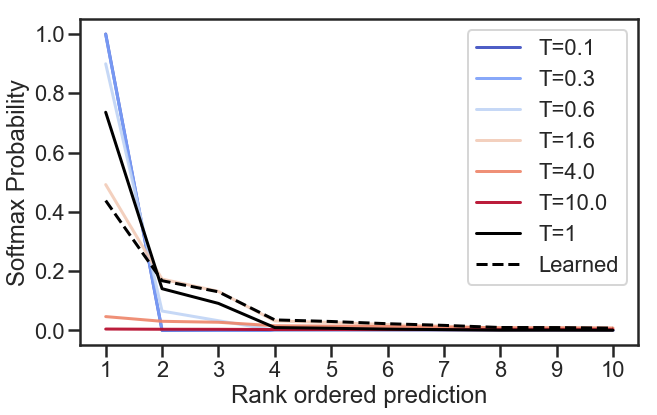

In [10]:
set_pub_plot_context(context="poster")
sns.set_style('ticks')
start = 0
stop = 1
density = 6
cm_subsection = np.linspace(start, stop, density) 

colors = [ cm.coolwarm(x) for x in cm_subsection ]
pal = sns.color_palette()
fig, ax = plt.subplots(figsize=(10,6))
eff_num_labs = []
temps = []
for i, logtemp in enumerate(np.linspace(-1,1, density)):
    temp = 10 ** logtemp
    temps.append(temp)
    temp_adjusted_probs = softmax(logits[rand_idx] / temp)
    entropy = scistats.entropy(temp_adjusted_probs)# -np.sum(temp_adjusted_probs * np.log(temp_adjusted_probs))
    eff_num_labs.append(np.exp(entropy))
    ax.plot(
        (np.arange(num_classes) + 1)[:num_ranks_to_show], 
        np.sort(temp_adjusted_probs)[::-1][:num_ranks_to_show], 
        label=f"T={round(temp, 1)}", color=colors[i], alpha=.9)
 


temps.append(1)
normal_probs = softmax(logits[rand_idx])
entropy = -np.sum( normal_probs * np.log(normal_probs))
eff_num_labs.append(np.exp(entropy))
ax.plot((np.arange(num_classes) + 1)[:num_ranks_to_show],
       np.sort(softmax(logits[rand_idx]))[::-1][:num_ranks_to_show], label="T=1", color='black'
       )

temps.append(temp_scale)
scaled_probs = softmax(logits[rand_idx] / temp_scale)
entropy = -np.sum( scaled_probs * np.log(scaled_probs))
eff_num_labs.append(np.exp(entropy))
ax.plot((np.arange(num_classes) + 1)[:num_ranks_to_show],
       np.sort(scaled_probs)[::-1][:num_ranks_to_show], '--', label="Learned", color='black'
       )

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.grid(False)
ax.set_xlabel("Rank ordered prediction")
ax.set_ylabel("Softmax Probability")
ax.legend()
path = '../../data/manuscript/figs/2/a'
os.makedirs(path, exist_ok=True)
save_for_pub(fig, path=path + '/v0', dpi=500)

In [11]:
eff_num_labs

[1.0000012,
 1.0128778,
 1.4952072,
 7.338433,
 497.15906,
 1158.4766,
 2.462533,
 10.37067]

In [12]:
temps

[0.1,
 0.251188643150958,
 0.6309573444801934,
 1.584893192461114,
 3.981071705534973,
 10.0,
 1,
 1.7226]

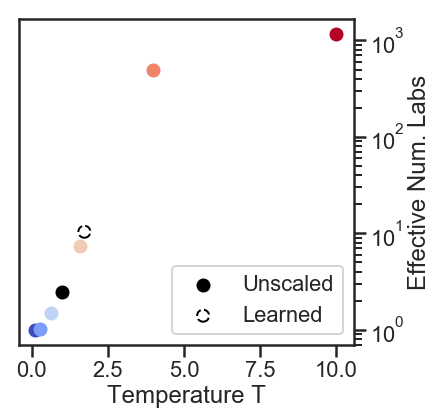

In [13]:
set_pub_plot_context(context="poster")
sns.set_style('ticks')
start = 0
stop = 1
density = 6
cm_subsection = np.linspace(start, stop, density) 

colors = [ cm.coolwarm(x) for x in cm_subsection ]
pal = sns.color_palette()
fig, ax = plt.subplots(figsize=(6,6))
for i, (t, efflab) in enumerate(zip(temps[:-2], eff_num_labs[:-2])):
    ax.scatter([t], [efflab], color=colors[i])
    
ax.scatter([temps[-2]], [eff_num_labs[-2]], color='black', label="Unscaled")
ax.scatter([temps[-1]], [eff_num_labs[-1]], linestyle='--', facecolor='none', edgecolor='black', label="Learned")
ax.legend()
ax.set_xlabel('Temperature T')

ax.set_ylabel('Effective Num. Labs')
ax.set_yscale('log')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
path = '../../data/manuscript/figs/2/b'
os.makedirs(path, exist_ok=True)
save_for_pub(fig, path=path + '/v0', dpi=500)

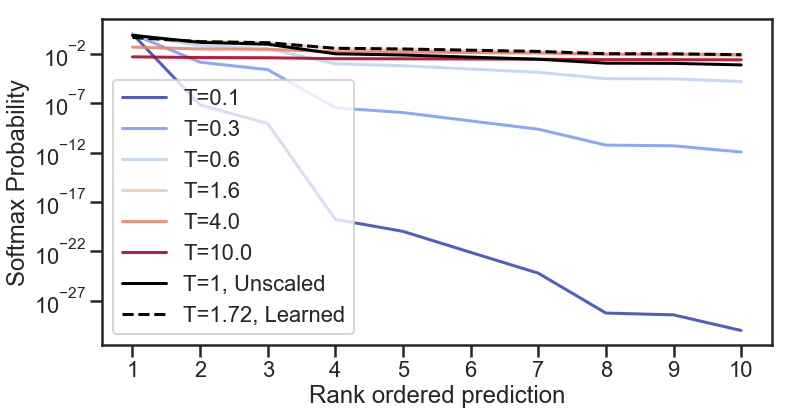

In [14]:
set_pub_plot_context(context="poster")
sns.set_style('ticks')
start = 0
stop = 1
density = 6
cm_subsection = np.linspace(start, stop, density) 

colors = [ cm.coolwarm(x) for x in cm_subsection ]
pal = sns.color_palette()
fig, ax = plt.subplots(figsize=(12,6))
for i, logtemp in enumerate(np.linspace(-1,1, density)):
    ax.plot(
        (np.arange(num_classes) + 1)[:num_ranks_to_show], 
        np.sort(softmax(logits[rand_idx] / 10 ** logtemp))[::-1][:num_ranks_to_show], 
        label=f"T={round(10 ** logtemp, 1)}", color=colors[i], alpha=.9)
    
ax.plot((np.arange(num_classes) + 1)[:num_ranks_to_show],
       np.sort(softmax(logits[rand_idx]))[::-1][:num_ranks_to_show], label="T=1, Unscaled", color='black'
       )
ax.plot((np.arange(num_classes) + 1)[:num_ranks_to_show],
       np.sort(softmax(logits[rand_idx] / temp_scale))[::-1][:num_ranks_to_show], '--', label="T=1.72, Learned", color='black'
       )

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.grid(False)
ax.set_xlabel("Rank ordered prediction")
ax.set_ylabel("Softmax Probability")
ax.set_yscale('log')
ax.legend()